<a href="https://colab.research.google.com/github/Tulasipriya-yellanki/Projects/blob/main/Walmart_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walmart project
* Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.
Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.
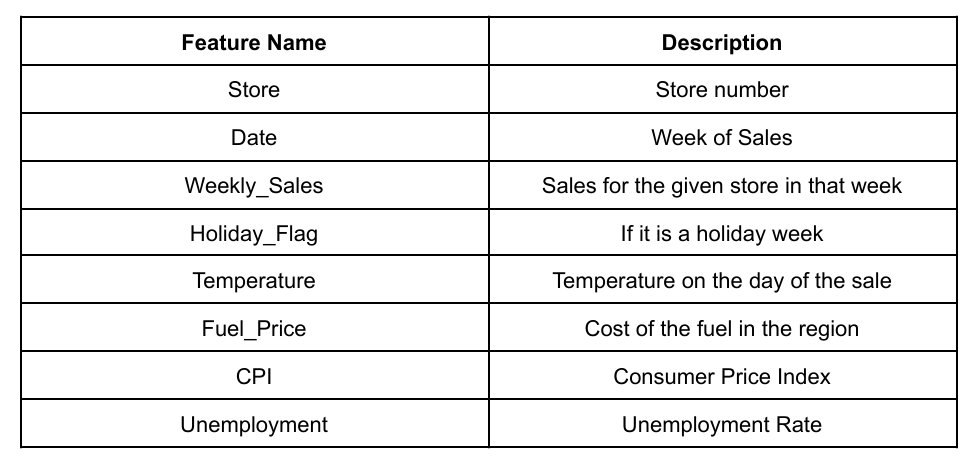
* 1. You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:
* a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?
* b. If the weekly sales show a seasonal trend, when and what could be the reason?
* c. Does temperature affect the weekly sales in any manner?
* d. How is the Consumer Price index affecting the weekly sales of various stores?
* e. Top performing stores according to the historical data.
* f.The worst performing store, and how significant is the difference between the highest and lowest performing stores.
* 2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks

In [ ]:
# importing all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing dataset
df=pd.read_csv('/content/drive/MyDrive/projects/Walmart project/Walmart.csv')
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


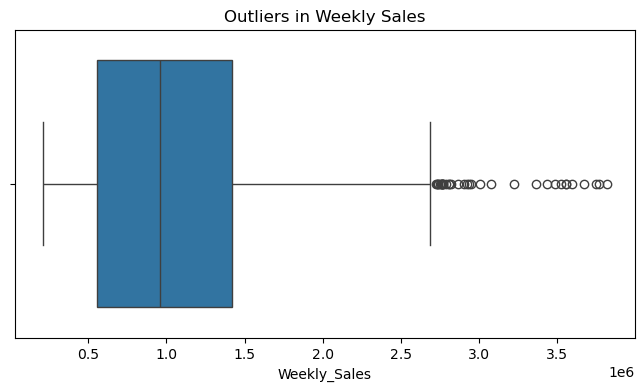

In [ ]:
# outliers analysis
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Weekly_Sales'])
plt.title("Outliers in Weekly Sales")
plt.show()


In [ ]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['is_outlier'] = (df['Weekly_Sales'] < lower) | (df['Weekly_Sales'] > upper)
print("Outlier count:", df['is_outlier'].sum())


Outlier count: 34


In [ ]:
#Statistical Analysis
corr = df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']].corr()
print(corr)


              Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment
Weekly_Sales      1.000000    -0.063810    0.009464 -0.072634     -0.106176
Temperature      -0.063810     1.000000    0.144982  0.176888      0.101158
Fuel_Price        0.009464     0.144982    1.000000 -0.170642     -0.034684
CPI              -0.072634     0.176888   -0.170642  1.000000     -0.302020
Unemployment     -0.106176     0.101158   -0.034684 -0.302020      1.000000


 ### a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most
 Yes, weekly sales are affected by the unemployment rate.
- The stores with the strongest negative correlation between unemployment print below


In [ ]:
# Calculate correlation between Weekly_Sales and Unemployment per store
results = (
 df.groupby("Store")[["Weekly_Sales","Unemployment"]]
      .corr()
      .iloc[0::2,-1]   # correlation of Weekly_Sales vs Unemployment
      .reset_index()
      .rename(columns={"Unemployment":"Correlation"})
      .sort_values("Correlation")
)

# Show stores most negatively affected
print("Stores most negatively affected by unemployment:")
print(results.head(10))

Stores most negatively affected by unemployment:
    Store       level_1  Correlation
37     38  Weekly_Sales    -0.785290
43     44  Weekly_Sales    -0.780076
38     39  Weekly_Sales    -0.384681
41     42  Weekly_Sales    -0.356355
40     41  Weekly_Sales    -0.350630
3       4  Weekly_Sales    -0.337015
16     17  Weekly_Sales    -0.263600
2       3  Weekly_Sales    -0.230413
36     37  Weekly_Sales    -0.221287
4       5  Weekly_Sales    -0.207043


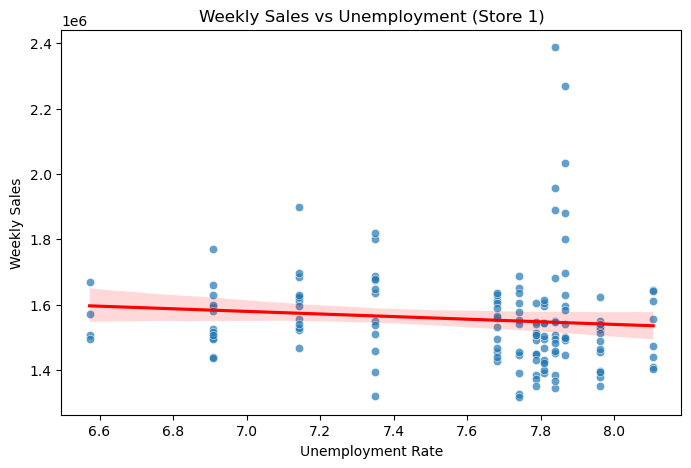

In [ ]:
# plot the which stores are suffering the most
store_id = 1   # change to the store number you want
store_data = df[df["Store"] == store_id]

plt.figure(figsize=(8,5))
sns.scatterplot(x="Unemployment", y="Weekly_Sales", data=store_data, alpha=0.7)
sns.regplot(x="Unemployment", y="Weekly_Sales", data=store_data, scatter=False, color="red")

plt.title(f"Weekly Sales vs Unemployment (Store {store_id})")
plt.xlabel("Unemployment Rate")
plt.ylabel("Weekly Sales")
plt.show()

 ### b. If the weekly sales show a seasonal trend, when and what could be the reason?
Yes, the weekly sales show a seasonal trend.
- When: November–December and August–September.
- Reason: Holiday shopping and back‑to‑school demand drive higher sales.


month
1     9.238846e+05
2     1.053200e+06
3     1.013309e+06
4     1.026762e+06
5     1.031714e+06
6     1.064325e+06
7     1.031748e+06
8     1.048017e+06
9     9.893353e+05
10    9.996321e+05
11    1.147266e+06
12    1.281864e+06
Name: Weekly_Sales, dtype: float64


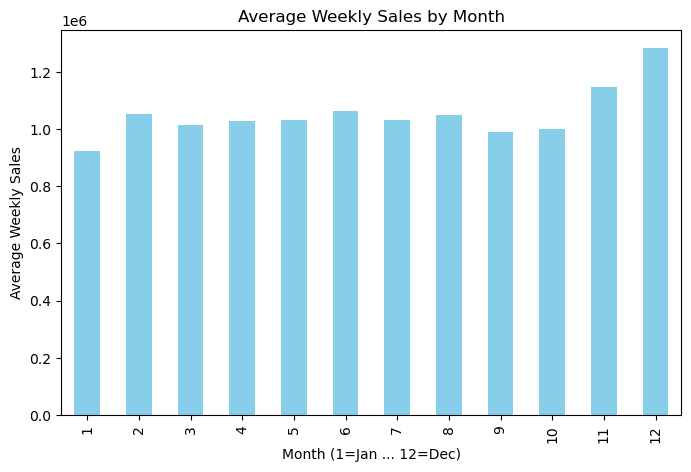

In [ ]:
#Seasonal Trend
# Clean column names (avoid spaces/typos)
df.columns = df.columns.str.strip().str.replace(" ", "_")
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
# Extract month
df['month'] = df['Date'].dt.month
monthly_sales = df.groupby('month')['Weekly_Sales'].mean().sort_index()
print(monthly_sales)
monthly_sales.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title("Average Weekly Sales by Month")
plt.xlabel("Month (1=Jan ... 12=Dec)")
plt.ylabel("Average Weekly Sales")
plt.show()

###  c. Does temperature affect the weekly sales in any manner?
Temperature does not strongly affect weekly sales directly. The observed variations are mostly due to seasonal events (holidays, back‑to‑school)

              Weekly_Sales  Temperature
Weekly_Sales       1.00000     -0.06381
Temperature       -0.06381      1.00000


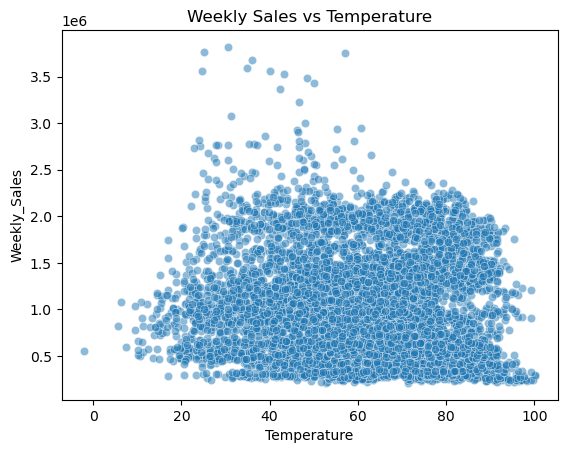

In [ ]:
# Correlation
print(df[['Weekly_Sales','Temperature']].corr())

# Scatter plot
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, alpha=0.5)
plt.title("Weekly Sales vs Temperature")
plt.show()

###  d. How is the Consumer Price index affecting the weekly sales of various stores?
The Consumer Price Index affects weekly sales by influencing customer purchasing power.

              Weekly_Sales       CPI
Weekly_Sales      1.000000 -0.072634
CPI              -0.072634  1.000000
Stores most negatively affected by CPI:
    Store       level_1  Correlation
35     36  Weekly_Sales    -0.915095
34     35  Weekly_Sales    -0.424107
13     14  Weekly_Sales    -0.419755
29     30  Weekly_Sales    -0.298188
42     43  Weekly_Sales    -0.285686
26     27  Weekly_Sales    -0.213082
17     18  Weekly_Sales    -0.193541
14     15  Weekly_Sales    -0.174467
20     21  Weekly_Sales    -0.163649
18     19  Weekly_Sales    -0.155341


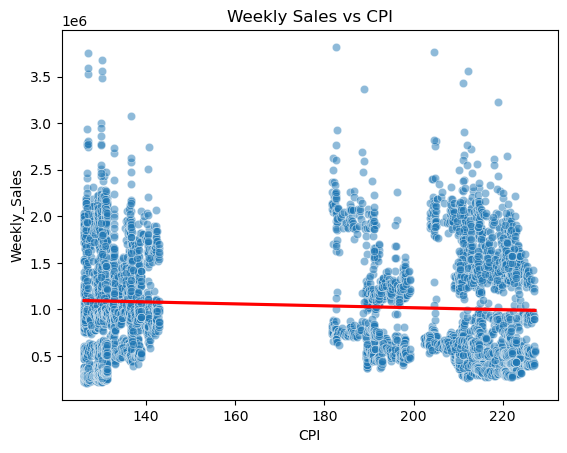

In [ ]:

# Correlation across all stores
print(df[['Weekly_Sales','CPI']].corr())
# Store-level correlation
store_cpi_corr = (
    df.groupby("Store")[["Weekly_Sales","CPI"]]
      .corr().iloc[0::2,-1]
      .reset_index()
      .rename(columns={"CPI":"Correlation"})
      .sort_values("Correlation")
)
print("Stores most negatively affected by CPI:")
print(store_cpi_corr.head(10))

# Visualization
sns.scatterplot(x="CPI", y="Weekly_Sales", data=df, alpha=0.5)
sns.regplot(x="CPI", y="Weekly_Sales", data=df, scatter=False, color="red")
plt.title("Weekly Sales vs CPI")
plt.show()

### e. Top performing stores according to the historical data.

Top 10 performing stores:
Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
10    1.899425e+06
27    1.775216e+06
6     1.564728e+06
1     1.555264e+06
39    1.450668e+06
Name: Weekly_Sales, dtype: float64


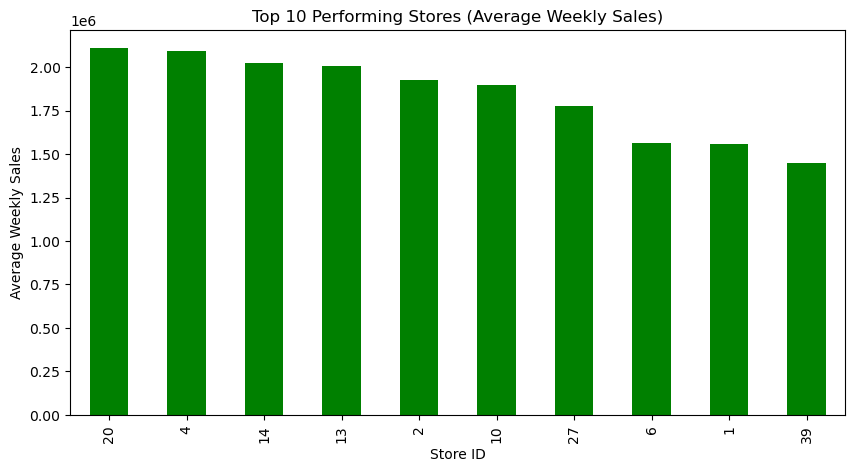

In [ ]:
# Average weekly sales per store
store_avg_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

print("Top 10 performing stores:")
print(store_avg_sales.head(10))

store_avg_sales.head(10).plot(kind='bar', figsize=(10,5), color='green')
plt.title("Top 10 Performing Stores (Average Weekly Sales)")
plt.xlabel("Store ID")
plt.ylabel("Average Weekly Sales")
plt.show()


### f.The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [ ]:
# Average weekly sales per store
store_avg_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values()

# Worst performing store
worst_store = store_avg_sales.index[0]
worst_sales = store_avg_sales.iloc[0]

# Best performing store
best_store = store_avg_sales.index[-1]
best_sales = store_avg_sales.iloc[-1]

# Difference
difference = best_sales - worst_sales

print("Worst performing store:", worst_store, "with avg weekly sales:", worst_sales)
print("Best performing store:", best_store, "with avg weekly sales:", best_sales)
print("Difference between best and worst:", difference)


Worst performing store: 33 with avg weekly sales: 259861.69202797202
Best performing store: 20 with avg weekly sales: 2107676.8703496503
Difference between best and worst: 1847815.1783216782


<Figure size 640x480 with 0 Axes>

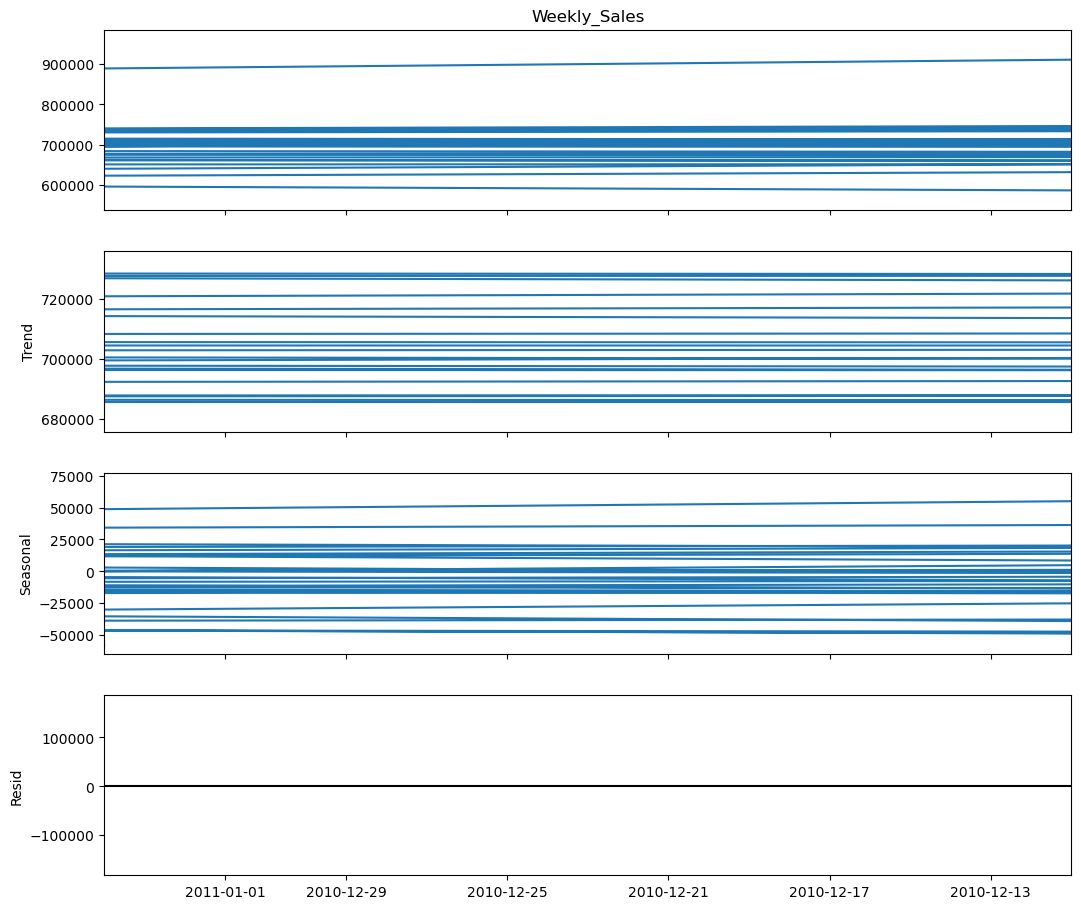

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales.Weekly_Sales, period=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

###  2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

Next 12 weeks forecast:
 2012-11-04    1.538713e+06
2012-11-11    1.556450e+06
2012-11-18    1.563433e+06
2012-11-25    1.566182e+06
2012-12-02    1.567265e+06
2012-12-09    1.567691e+06
2012-12-16    1.567859e+06
2012-12-23    1.567925e+06
2012-12-30    1.567951e+06
2013-01-06    1.567961e+06
2013-01-13    1.567965e+06
2013-01-20    1.567966e+06
Freq: W-SUN, Name: predicted_mean, dtype: float64


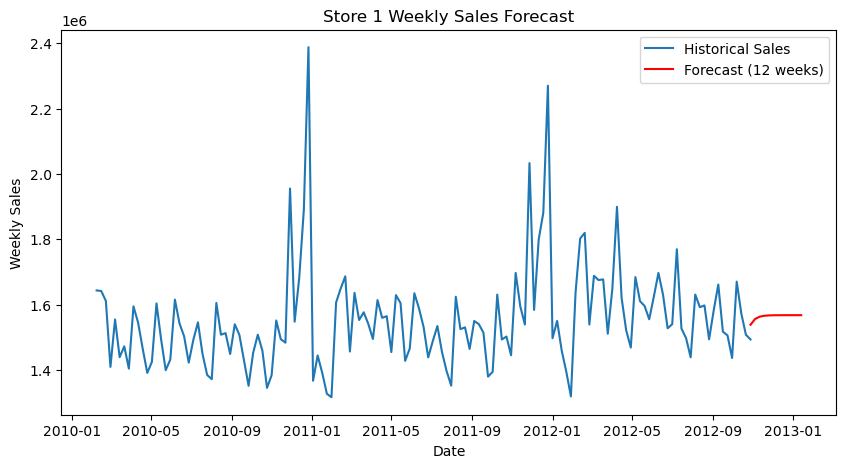

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# 2. Pick one store (example: Store 1)
store_data = df[df['Store'] == 1].set_index('Date')
weekly_sales = store_data['Weekly_Sales'].resample('W').sum()

# 3. Fit ARIMA model (simple choice: p=1, d=1, q=1)
model = ARIMA(weekly_sales, order=(1,1,1))
model_fit = model.fit()

# 4. Forecast next 12 weeks
forecast = model_fit.forecast(steps=12)
print("Next 12 weeks forecast:\n", forecast)

# 5. Plot results
plt.figure(figsize=(10,5))
plt.plot(weekly_sales.index, weekly_sales, label="Historical Sales")
plt.plot(pd.date_range(weekly_sales.index[-1], periods=12, freq='W'),
         forecast, label="Forecast (12 weeks)", color="red")
plt.title("Store 1 Weekly Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()